In [1]:
import dataclasses

import jax

from openpi.models import model as _model
from openpi.policies import droid_policy
from openpi.policies import policy_config as _policy_config
from openpi.shared import download
from openpi.training import config as _config
from openpi.training import data_loader as _data_loader

# Policy inference

The following example shows how to create a policy from a checkpoint and run inference on a dummy example.

# Working with a live model


The following example shows how to create a live model from a checkpoint and compute training loss. First, we are going to demonstrate how to do it with fake data.


In [2]:
config = _config.get_config("pi0_opaque_low_mem_finetune")

checkpoint_dir = download.maybe_download("/media/zeyu/082b281d-ee9b-bc4b-be11-a1acf8642a75/DockerCode/openpi/checkpoints/pi0_opaque_low_mem_finetune/train0810/20000")
key = jax.random.key(0)

# Create a model from the checkpoint.
# model = config.model.load(_model.restore_params(checkpoint_dir / "params"))

# # We can create fake observations and actions to test the model.
# obs, act = config.model.fake_obs(), config.model.fake_act()

# # Sample actions from the model.
# loss = model.compute_loss(key, obs, act)
# print("Loss shape:", loss.shape)

Now, we are going to create a data loader and use a real batch of training data to compute the loss.

In [ ]:
# Reduce the batch size to reduce memory usage.
config = dataclasses.replace(config, batch_size=16)

# Load a single batch of data. This is the same data that will be used during training.
# NOTE: In order to make this example self-contained, we are skipping the normalization step
# since it requires the normalization statistics to be generated using `compute_norm_stats`.
loader = _data_loader.create_data_loader(config, num_batches=16, skip_norm_stats=False)
obs, act = next(iter(loader))
# print(obs.state)
# # Sample actions from the model.
# loss = model.compute_loss(key, obs, act)

# # Delete the model to free up memory.
# del model

# print("Loss shape:", loss.shape)

Resolving data files:   0%|          | 0/45 [00:00<?, ?it/s]

0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
ERROR:tornado.general:SEND Error: Host unreachable
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


In [4]:
obs.state

Array([[-0.13648604, -0.76338977,  1.713534  ,  0.42042306, -0.41715884,
         1.4905932 , -1.0889155 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-0.13648604, -0.76338977,  1.713534  ,  0.42042306, -0.41715884,
         1.4905932 , -1.0889155 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [-0.13648604, -0.76338977,  1.713534  ,  0.4204

In [9]:
obs.state

Array([[-0.13648604, -0.76338977,  1.713534  ,  0.42042306, -0.41715884,
         1.4905932 , -1.0889155 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [4]:
# Sample actions from the model.
loss = model.compute_loss(key, obs, act)

# Delete the model to free up memory.
del model

print("Loss shape:", loss.shape)

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Loss shape: (2, 50)


In [5]:
loss

Array([[0.00062654, 0.00054254, 0.00034283, 0.0003346 , 0.00049172,
        0.00049384, 0.00057042, 0.00063939, 0.00077521, 0.00115547,
        0.00051412, 0.00192723, 0.00905139, 0.01154506, 0.01140673,
        0.00994038, 0.01339287, 0.00908612, 0.01205207, 0.01257548,
        0.01403218, 0.01632547, 0.02403825, 0.03755725, 0.03718912,
        0.05208584, 0.00895477, 0.01036663, 0.01867146, 0.01284259,
        0.01745662, 0.00572615, 0.01476041, 0.01262394, 0.00607576,
        0.01039469, 0.00691671, 0.01122587, 0.00959704, 0.03308253,
        0.01610171, 0.00482554, 0.01419255, 0.0070139 , 0.03825508,
        0.03482482, 0.02114468, 0.03135047, 0.01810315, 0.00643955],
       [0.00037592, 0.0002426 , 0.00037958, 0.00026702, 0.00037   ,
        0.00061036, 0.00069323, 0.00078422, 0.00063925, 0.00043604,
        0.000526  , 0.00195921, 0.00283861, 0.00124998, 0.00144781,
        0.00570753, 0.00411303, 0.00648559, 0.00764092, 0.00565133,
        0.0092413 , 0.00682064, 0.0106536 , 0.0

In [6]:
loss.mean()

Array(0.00983454, dtype=float32)

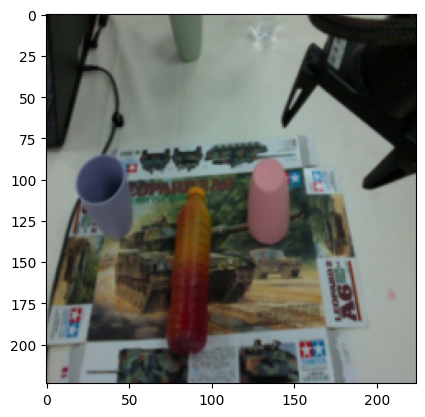

In [7]:
obs.images["base_0_rgb"][2].shape
#print img
import numpy as np
import matplotlib.pyplot as plt
# extend the image from -1 to 1 to 0 to 255
img = (obs.images["base_0_rgb"][0] + 1) / 2 * 255
img = img.astype(np.uint8)
plt.imshow(img)

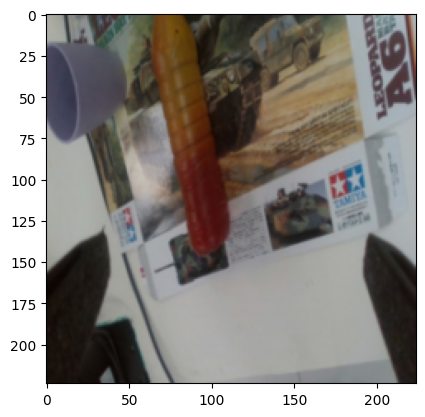

In [9]:
obs.images["left_wrist_0_rgb"][15]
img = (obs.images["left_wrist_0_rgb"][0] + 1) / 2 * 255
img = img.astype(np.uint8)
plt.imshow(img)

In [32]:
obs.tokenized_prompt

Array([[    2, 18075,   908,   573, 71857, 12989,   578,  2040,   665,
          611,   573,  1156,  2857,   576,  9010,  7190,   108,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    2, 18075,   908,   573, 71857, 12989,   578,  2040,   665,
          611,   573,  1156,  2857,   576,  9010,  7190,   108,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0]], dtype=int32)

In [35]:
import openpi.models.tokenizer as _tokenizer
tokenizer = _tokenizer.PaligemmaTokenizer()
print(tokenizer.tokenize("pick up the opaque bottle and place it on the other side of pink cup"))

(array([    2, 18075,   908,   573, 71857, 12989,   578,  2040,   665,
         611,   573,  1156,  2857,   576,  9010,  7190,   108,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0]), array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False]))


In [71]:
act[2].shape

(50, 32)

In [74]:
loss.shape

(1, 50)